In [ ]:
pip install pandas numpy==1.26.4 matplotlib seaborn scikit-learn==1.2.2 xgboost tensorflow streamlit plotly nbformat lightgbm mlflow scikit-optimize bayesian-optimization


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install scipy


In [ ]:
pip install missingno scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import missingno as msno # Missing Value Visualization
from scipy import stats
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv("e:\\Course\\Aamir\\project 3\\train.csv")


In [7]:
# Display first 5 rows
df.head()


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [8]:
#STEP-1
# Checking Dataset Overview
# Getting an idea about the data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [ ]:
'''Most columns have appropriate data types, but the Policy Start Date is stored as an object, and should be converted to datetime for proper date-based analysis.
  2) Several columns, such as Occupation, Previous Claims, and Credit Score, have significant missing values (up to 30%)
'''

In [15]:
# Convert 'Policy Start Date' to datetime
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
df['Policy Start Year'] = df['Policy Start Date'].dt.year

In [9]:
#STEP-2
# Getting statistics analysis for numerical columns
df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [ ]:
'''
Conclusions
1)Age ranges from 18 to 64, with a mean of 41.1 years, and a roughly normal distribution.
2)Annual Income has a large range, from 1,000 to 149,997, showing outliers that could skew the data.
3)The Vehicle Age is mainly around 9 years, with a max of 19 years, suggesting most vehicles are fairly new.
4)Premium Amount shows a significant spread, with a mean of 1,102 and a maximum of 4,999, indicating right-skewed data.
5)Previous Claims have a low mean and a max of 9, suggesting that most people have minimal claims.

'''

In [10]:
#STEP-3
# Getting the number of unique values
df[['id', 'Age', 'Health Score', 'Insurance Duration', 'Customer Feedback', 'Credit Score', 'Smoking Status']].nunique()

id                    1200000
Age                        47
Health Score           532657
Insurance Duration          9
Customer Feedback           3
Credit Score              550
Smoking Status              2
dtype: int64

In [11]:
# Check the column names 
df.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [12]:
# Checking unique values and frequency for categorical columns
categorical_columns = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 
                       'Location', 'Policy Type', 'Customer Feedback', 
                       'Smoking Status', 'Exercise Frequency', 'Property Type']

# Loop through each categorical column and print unique values and frequency
for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")


Column: Gender
Gender
Male      602571
Female    597429
Name: count, dtype: int64


Column: Marital Status
Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64


Column: Education Level
Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64


Column: Occupation
Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64


Column: Location
Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64


Column: Policy Type
Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64


Column: Customer Feedback
Customer Feedback
Average    377905
Poor       375518
Good       368753
Name: count, dtype: int64


Column: Smoking Status
Smoking Status
Yes    601873
No     598127
Name: count, dtype: int64


Column: Exercise Frequency
Exercise Frequenc

In [ ]:
'''
Conclusions:
1) Gender: The dataset has a nearly equal distribution of male and female customers (602,571 males, 597,429 females).

2) Marital Status: Most customers are either single or married, with single customers slightly outnumbering married ones.

3) Education Level: Customers are mostly well-educated, with a balance among Master’s, PhD, Bachelor's, and High School degrees.

4) Occupation: The majority of customers are employed or self-employed, with a smaller portion being unemployed.

5) Location: There is a near-equal distribution across suburban, rural, and urban areas.

6) Policy Type: Most customers have either a Premium or Comprehensive policy, with slightly fewer on the Basic policy.

7) Customer Feedback: Customer feedback is fairly distributed across average, poor, and good ratings.

8) Smoking Status: Smoking status is split almost evenly, with slightly more non-smokers.

9)Exercise Frequency: Most customers exercise weekly or monthly, with fewer exercising daily or rarely.

10)Property Type: The property type distribution is balanced among houses, apartments, and condos.
'''

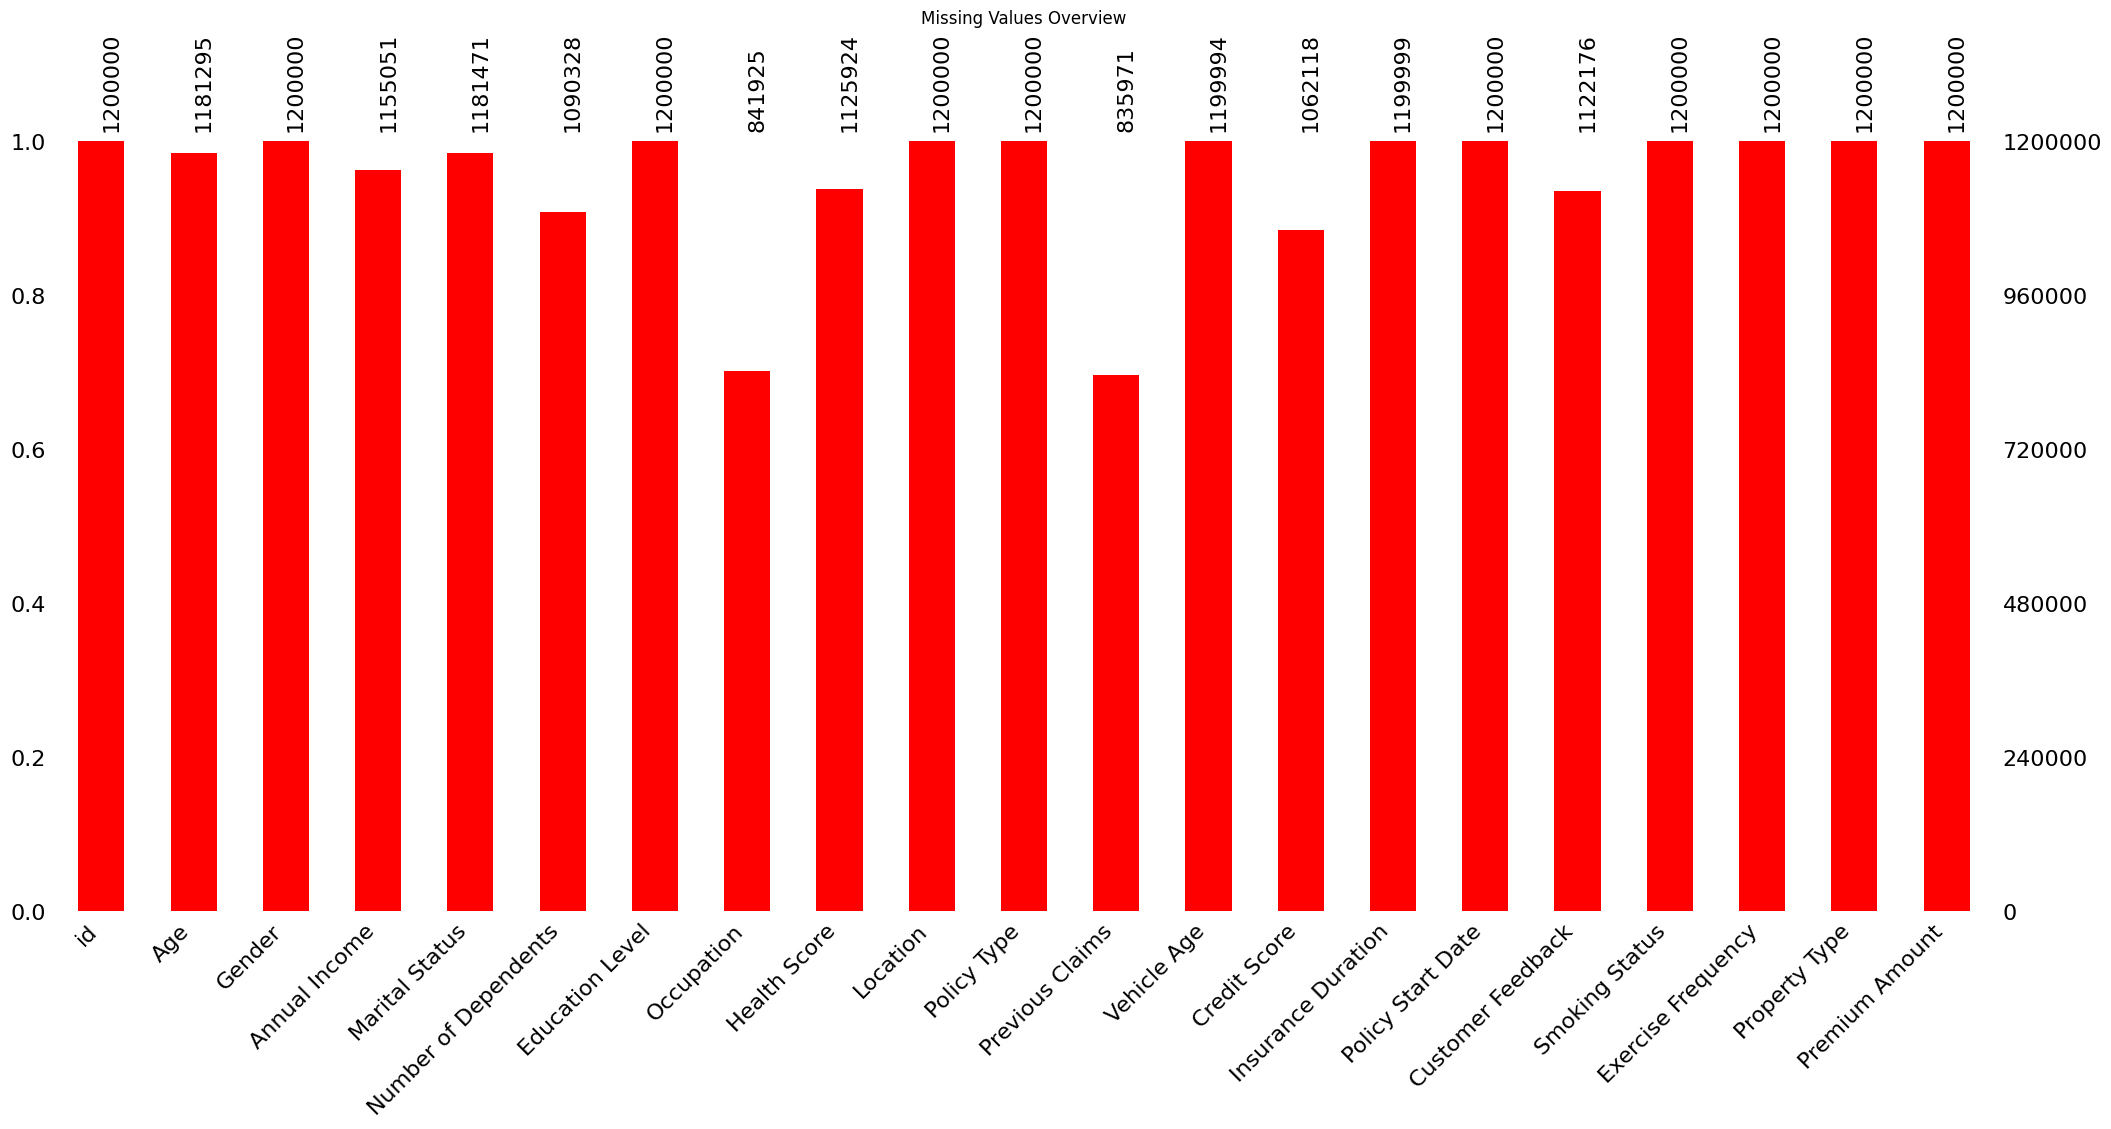

In [13]:
# Check for Missing Values (Visualization)
plt.figure(figsize=(10,6))
msno.bar(df, color='red')
plt.xticks(rotation=90)
plt.title("Missing Values Overview")
plt.show()

In [ ]:
'''
Conclusions:
1)The dataset has minimal missing data, with most columns having full records (1.2 million entries), except for columns like Occupation and Previous Claims, which have significant missing values.

2)Columns such as id, Gender, Marital Status, Location, and Property Type have no missing values.

3)Columns with Missing Data: Occupation and Previous Claims have the most missing data, which might need to be handled before analysis.
'''

In [14]:
# Show Percentage of Missing Values
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Missing Values (%):\n", missing_percent[missing_percent > 0].sort_values(ascending=False))

Missing Values (%):
 Previous Claims         30.335750
Occupation              29.839583
Credit Score            11.490167
Number of Dependents     9.139333
Customer Feedback        6.485333
Health Score             6.173000
Annual Income            3.745750
Age                      1.558750
Marital Status           1.544083
Vehicle Age              0.000500
Insurance Duration       0.000083
dtype: float64


In [28]:
# Identify Numerical & Categorical Features
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount', 'Policy Start Year']
Categorical Columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']


In [19]:
#Filling missing values with mean for numerical columns and mode for categorical columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


<Figure size 1500x1000 with 0 Axes>

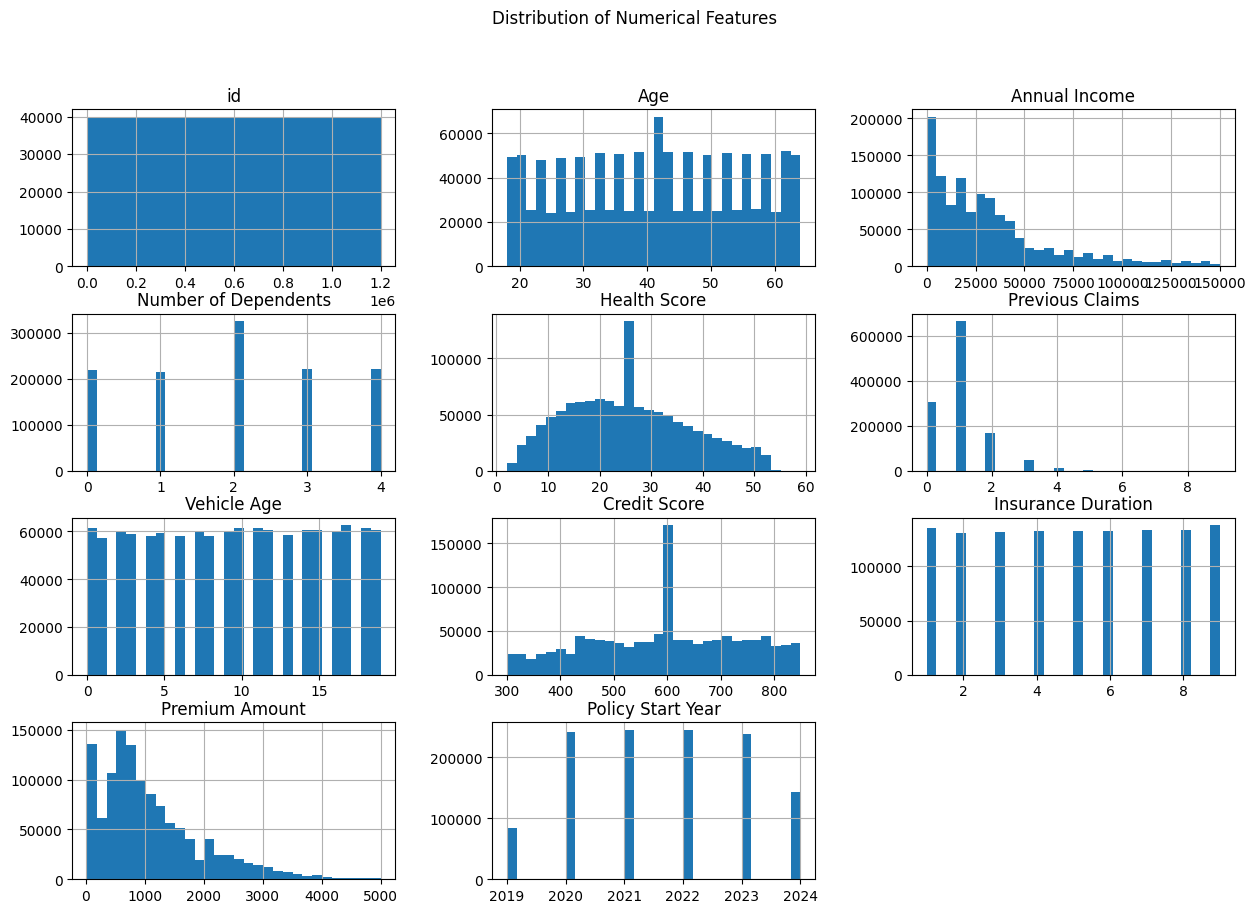

In [20]:
# Univariate Analysis - Histograms & Boxplots for Numerical Features
plt.figure(figsize=(15,10))
df[num_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Distribution of Numerical Features")
plt.show()


In [ ]:
# Creating boxplots for each numerical column
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [26]:
# Drop Irrelevant Columns
df.drop(columns=['id', 'Policy Start Date'], inplace=True)


In [ ]:
#categorical vs numerical relationships
#getting a table of descriptive statistics for num_col within each category of cat_col
results = {} # Store results in a dictionary
for cat_col in cat_cols:
    if df[cat_col].nunique() < 10:
        for num_col in num_cols:
            grouped = df.groupby(cat_col)[num_col].describe()
            results[f'{cat_col} vs {num_col}'] = grouped
# Display results
for key, value in results.items():
    print(f"\n{key}:\n")
    print(value)


In [29]:
#categorical vs numerical relationships
#getting a table of descriptive statistics for num_col within each category of cat_col
results = {}  # Store results in a dictionary

# Iterate over categorical columns
for cat_col in cat_cols:
    if df[cat_col].nunique() < 10:  # Only consider categorical columns with less than 10 unique values
        # Iterate over numerical columns
        for num_col in num_cols:
            # Group by the categorical column and compute descriptive statistics for the numerical column
            grouped = df.groupby(cat_col)[num_col].describe()
            # Store the result in the dictionary with a descriptive key
            results[f'{cat_col} vs {num_col}'] = grouped

# Display results
for key, value in results.items():
    print(f"\n{key}:\n")
    print(value)



Gender vs Age:

           count       mean        std   min   25%        50%   75%   max
Gender                                                                   
Female  597429.0  41.142665  13.437654  18.0  30.0  41.145563  53.0  64.0
Male    602571.0  41.148436  13.430404  18.0  30.0  41.145563  53.0  64.0

Gender vs Annual Income:

           count          mean           std  min     25%      50%      75%  \
Gender                                                                        
Female  597429.0  32774.818487  31580.698986  1.0  8607.0  24997.0  43945.0   
Male    602571.0  32715.869662  31561.522478  2.0  8695.0  24986.0  43922.0   

             max  
Gender            
Female  149996.0  
Male    149997.0  

Gender vs Number of Dependents:

           count      mean       std  min  25%  50%  75%  max
Gender                                                       
Female  597429.0  2.008803  1.351920  0.0  1.0  2.0  3.0  4.0
Male    602571.0  2.011055  1.350124  0.0  1.0 

In [35]:
# Outlier Detection using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]
outliers_summary = {col: detect_outliers(df, col) for col in num_cols}
print("\nOutlier Counts:", outliers_summary)



Outlier Counts: {'Age': 0, 'Annual Income': 70466, 'Number of Dependents': 0, 'Health Score': 0, 'Previous Claims': 62066, 'Vehicle Age': 0, 'Credit Score': 0, 'Insurance Duration': 0, 'Premium Amount': 49320, 'Policy Start Year': 0}


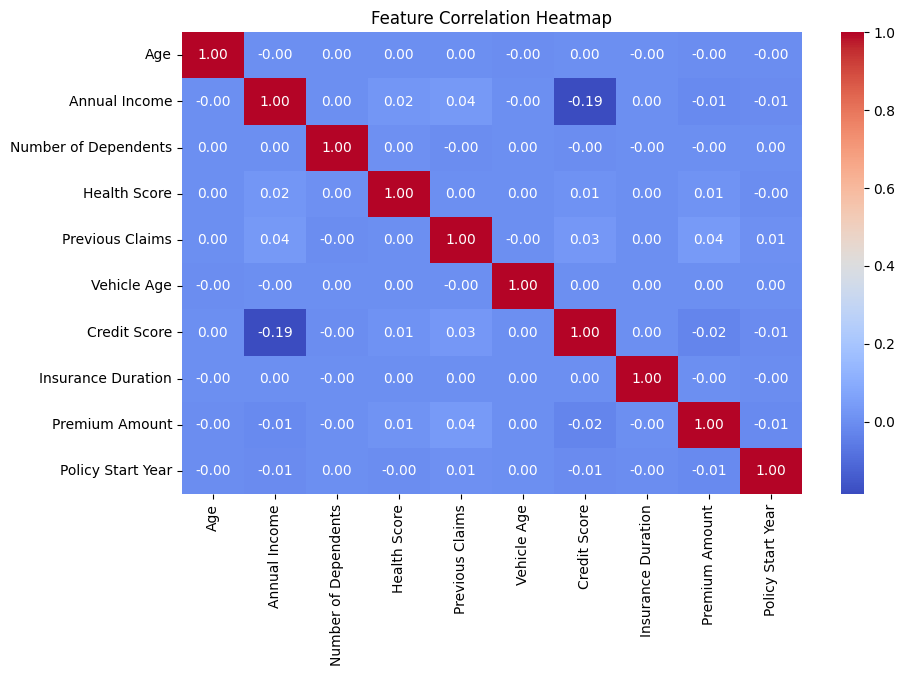

In [36]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Chi-Square
The Chi-Square test indicates that there is a statistically signicant association between the two categorical variables being compared

In [37]:
# Chi-Square (Example: Gender vs. Smoking Status)
chi_df=pd.DataFrame(columns=["Feature1","Feature2","chi2","p-value"])
for i in range(len(cat_cols)):
    for j in range(i + 1, len(cat_cols)):
        if df[cat_cols[i]].nunique() < 10 and df[cat_cols[j]].nunique() < 10:
            contingency = pd.crosstab(df[cat_cols[i]], df[cat_cols[j]])
            chi2, p, dof, expected = stats.chi2_contingency(contingency)
            chi_df.loc[len(chi_df)] = [cat_cols[i], cat_cols[j], float("{:.5f}".format(chi2)),float("{:.5f}".format(p))]
            #print(f"Chi-Square: chi2={chi2}, p-value={p}")
chi_df.shape


(45, 4)

In [38]:
chi_df.head()

,Feature1,Feature2,chi2,p-value
0,Gender,Marital Status,8.34450,0.01542
1,Gender,Education Level,1.44928,0.69402
2,Gender,Occupation,3.63997,0.16203
3,Gender,Location,2.40557,0.30036
4,Gender,Policy Type,2.85984,0.23933


In [39]:
chi_df.sort_values(by='p-value', ascending=False, ignore_index=True).head(10)

,Feature1,Feature2,chi2,p-value
0,Marital Status,Exercise Frequency,1.80472,0.93675
1,Customer Feedback,Smoking Status,0.43219,0.80566
2,Location,Property Type,1.82081,0.76867
3,Marital Status,Policy Type,1.94153,0.74651
4,Location,Exercise Frequency,3.55689,0.73639
5,Gender,Education Level,1.44928,0.69402
6,Education Level,Customer Feedback,4.01865,0.67415
7,Occupation,Location,3.05227,0.54912
8,Education Level,Occupation,5.15434,0.52418
9,Gender,Exercise Frequency,2.33777,0.50532


In [ ]:
# visualize the relationship between each numerical feature in your dataset and the target variable (Premium Amount) using scatter plots. 
# Feature vs Target (Premium Amount)
sample_df=df.sample(1000)
for col in num_cols:
    if col != 'Premium Amount':
        plt.figure(figsize=(6, 3))
        sns.scatterplot(x=sample_df[col], y=sample_df['Premium Amount'])
        plt.title(f"{col} vs Premium Amount")
        plt.show()


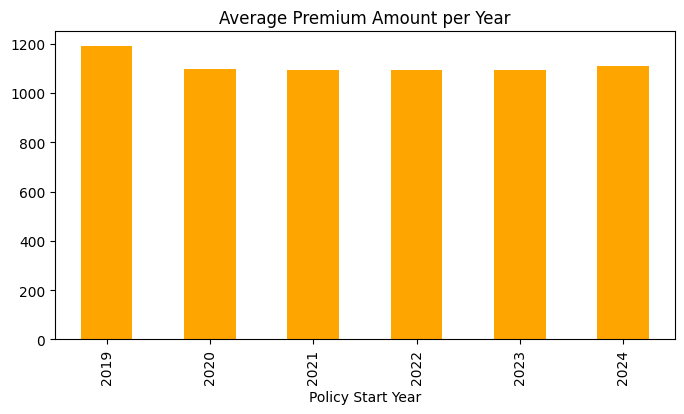

In [41]:
# Time-Based Analysis
df.groupby('Policy Start Year')['Premium Amount'].mean().plot(kind='bar', figsize=(8, 4), color='orange')
plt.title("Average Premium Amount per Year")
plt.show()

In [ ]:
#Age and Premium Amount
#How does "Age" inuence "Premium Amount"? older customers tend to pay higher or lower premiums

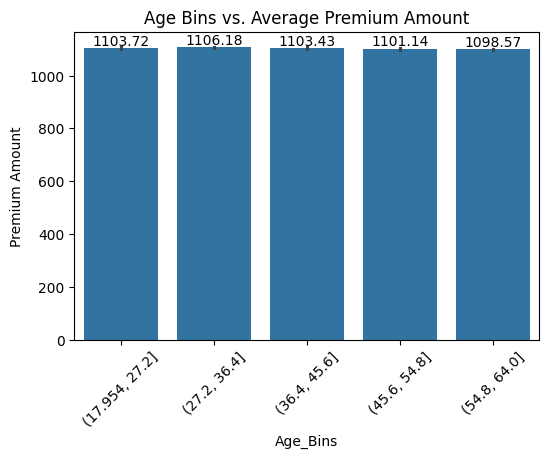

In [43]:
sample_data=df.copy()
sample_data['Age_Bins'] = pd.cut(sample_data['Age'], bins=5)
plt.figure(figsize=(6,4))
ax=sns.barplot(x='Age_Bins', y='Premium Amount', data=sample_data)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Age Bins vs. Average Premium Amount')
plt.xticks(rotation=45)
plt.show()

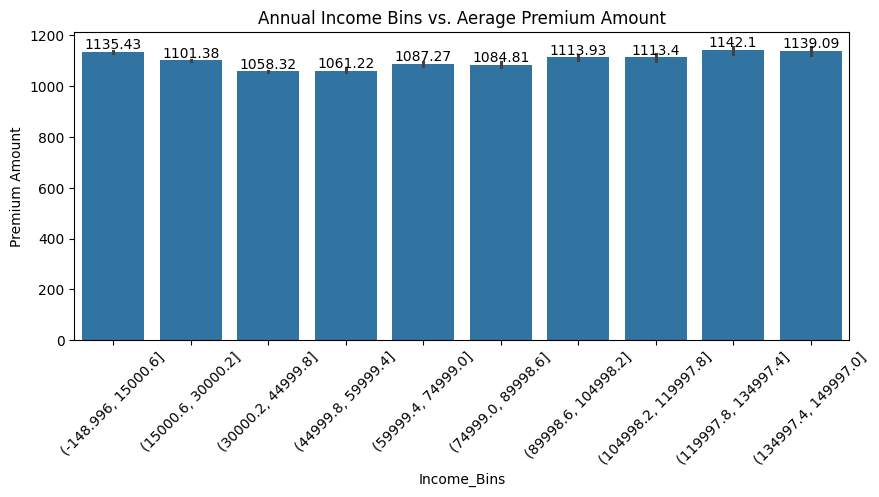

In [44]:
#Finding the relationship between "Annual Income" and "Premium Amount"
#This examines if income level correlates with premium costs.
sample_data['Income_Bins'] = pd.cut(sample_data['Annual Income'], bins=10)
plt.figure(figsize=(10, 4))
ax=sns.barplot(x='Income_Bins', y='Premium Amount', data=sample_data)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Annual Income Bins vs. Aerage Premium Amount')
plt.xticks(rotation=45)
plt.show()


In [45]:
print(sample_data["Annual Income"].min(),sample_data["Annual Income"].max())


1.0 149997.0


In [46]:
#Health Score Distribution by Policy Type
sample_data["Health Score"].groupby([sample_data["Policy Type"]]).describe()

,count,mean,std,min,25%,50%,75%,max
Policy Type,,,,,,,,
Basic,398554.0,25.650416,11.817550,2.024415,16.569504,25.613908,33.837383,58.975914
Comprehensive,399600.0,25.609021,11.825234,2.012237,16.539119,25.613908,33.764905,58.569689
Premium,401846.0,25.582558,11.819551,2.056559,16.549517,25.613908,33.694463,58.886035


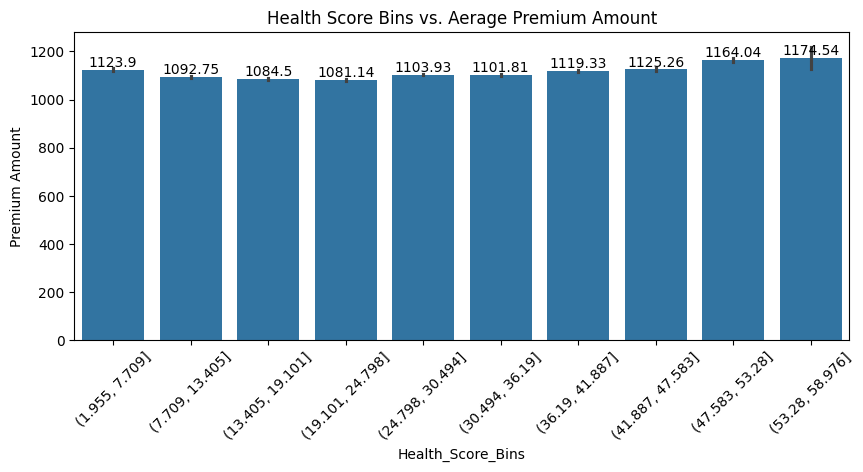

In [48]:
#Does "Health Score" have a signicant impact on "Premium Amount"?
#This explores if healthier individuals get better premium rates.
sample_data['Health_Score_Bins'] = pd.cut(sample_data['Health Score'], bins=10)
plt.figure(figsize=(10, 4))
ax=sns.barplot(x='Health_Score_Bins', y='Premium Amount', data=sample_data)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Health Score Bins vs. Aerage Premium Amount')
plt.xticks(rotation=45)
plt.show()